In [4]:
from IPython.display import Image
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt 

%matplotlib inline
plt.rcParams["figure.figsize"]=[10,10]
numpy.random.seed(42)

In [6]:
from sklearn.datasets import make_blobs

In [8]:
k=3
n_muestras=5000

centroides=[(24,30), (52,35), (35,60)]
X, Clases_reales=make_blobs(n_samples=n_muestras, n_features=2, cluster_std=5.0, centers=centroides, shuffle=False, random_state=42)

In [10]:
from matplotlib import cm

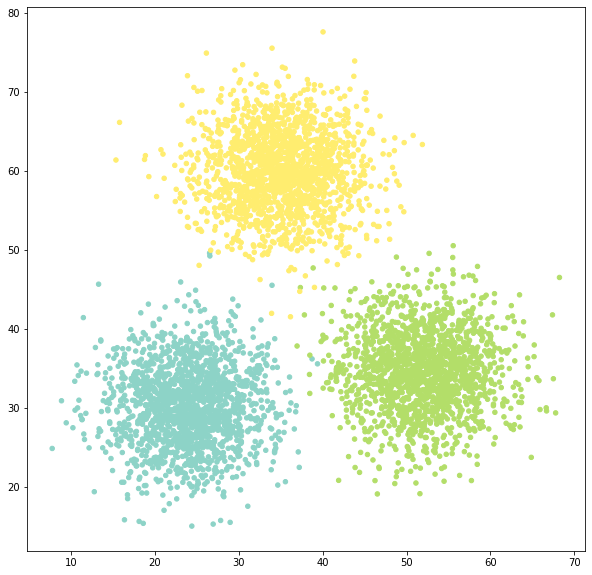

In [12]:
plt.scatter(X[:,0],X[:,1], c=Clases_reales, s=20, marker="o", cmap=cm.Set3)

In [14]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure

In [16]:
estimador_kmedias=KMeans(n_clusters=3)
etiquetas_kmedias=estimador_kmedias.fit(X).labels_

Text(0.5, 1.0, 'Clusters producidos con KMedias')

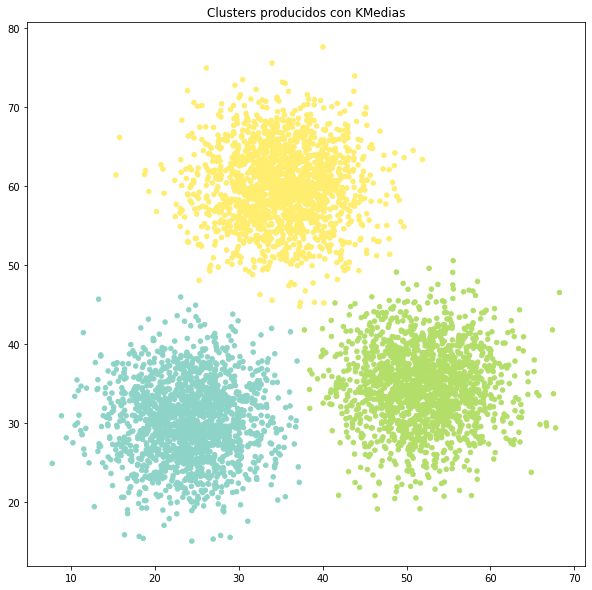

In [18]:
plt.scatter(X[:,0], X[:,1], c=etiquetas_kmedias, s=20, marker="o", cmap=cm.Set3)
plt.title("Clusters producidos con KMedias")

In [20]:
#Dado que en este ejemplo, tenemos las clases verdaderas (ya que hemos generado el dataset de forma artificial), se usaran funciones auxiliares que nos ayuden a mostrar de forma clara aquellos puntos que se clasifican de forma incorrecta

#En primer lugar, creamos una funcion que que nos calcule el indice de jaccard de dos grupos de puntos (definido como el numero de elementos comunes a los dos grupos (interseccion) de los dos grupos dividida por el numero de elementos en cualquiera de los dos grupos (la union))

In [22]:
def jaccard_index(cluster1, cluster2):
    interseccion=numpy.intersect1d(cluster1, cluster2).shape[0]
    union=numpy.union1d(cluster1, cluster2).shape[0]
    return interseccion/union

In [24]:
jaccard_index(X[Clases_reales==0], X[etiquetas_kmedias==0])

0.9952095808383233

In [26]:
from itertools import product 

In [28]:
def emparejar_clusters_clases(clusters, clases):
    combinaciones=product(numpy.unique(clases), numpy.unique(clusters))
    emparejamientos={}
    class_ids=numpy.unique(clases)
    clusters_ids=numpy.unique(clusters)
    for cluster_id in clusters_ids:
        old_jaccard=0
        for class_id in class_ids:
            new_jaccard=jaccard_index(X[clases==class_id], X[clusters==cluster_id])
            if new_jaccard > old_jaccard:
                old_jaccard=new_jaccard
                emparejamientos[cluster_id]=class_id
                if new_jaccard>=0.5:
                    break
    return emparejamientos

In [30]:
emparejar_clusters_clases(etiquetas_kmedias, Clases_reales)

{0: 0, 1: 1, 2: 2}

In [32]:
#Cons estas funciones podemos crear una funcion auxiliar que nos transforma unas etiquetas de cluster para que se correspondan con las clases reales, y una funcion que nos devuelva aquellas observaciones cuya clase no coincida con el cluster

In [34]:
def alinear_clusters(clusters, clases):
    remplazos=emparejar_clusters_clases(clusters, clases)
    clusters_alineados=[remplazos[X] for X in clusters]
    return numpy.array(clusters_alineados)

def encontrar_errores(clusters, clases):
    etiquetas_clusters_alineadas= alinear_clusters(clusters, clases)
    return X[clases!=etiquetas_clusters_alineadas]

In [36]:
#ahora podemos visualizar los puntos mal agrupados

Text(0.5, 1.0, 'Clusters producidos con KMedias, Mostrando elementos erroneamente clasificados')

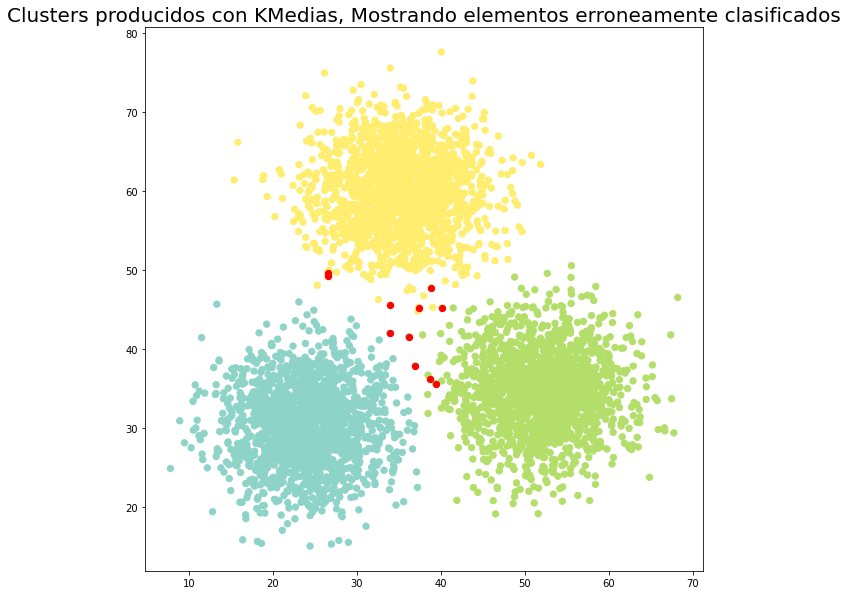

In [38]:
errores_kmedias=encontrar_errores(etiquetas_kmedias, Clases_reales)
plt.scatter(X[:,0], X[:,1], c=etiquetas_kmedias, s=40, marker="o", cmap=cm.Set3)
plt.scatter(errores_kmedias[:,0], errores_kmedias[:,1], s=40, marker="o", color="red")
plt.title("Clusters producidos con KMedias, Mostrando elementos erroneamente clasificados", size=20)

In [40]:
silhouette_score(X, etiquetas_kmedias)

0.6801855780824735

In [42]:
homogeneity_completeness_v_measure(Clases_reales, etiquetas_kmedias)

(0.9848477175260213, 0.9848485778151888, 0.9848481476704172)

In [44]:
#Para evaluar con DBSCAN, es dificil comparar con KMedias dado que en KMedias se especifica el numero de clusters y en DBSCAN se especifica la densidad de los mismos

In [46]:
estimador_dbscan=DBSCAN(eps=10, min_samples=1000)
etiquetas_dbscan=estimador_dbscan.fit(X).labels_

In [48]:
numpy.unique(etiquetas_dbscan)

array([-1,  0,  1,  2], dtype=int64)

Text(0.5, 1.0, 'Clusters producidos con DBSCAN. Mostrando elementos erroneamente clasificados')

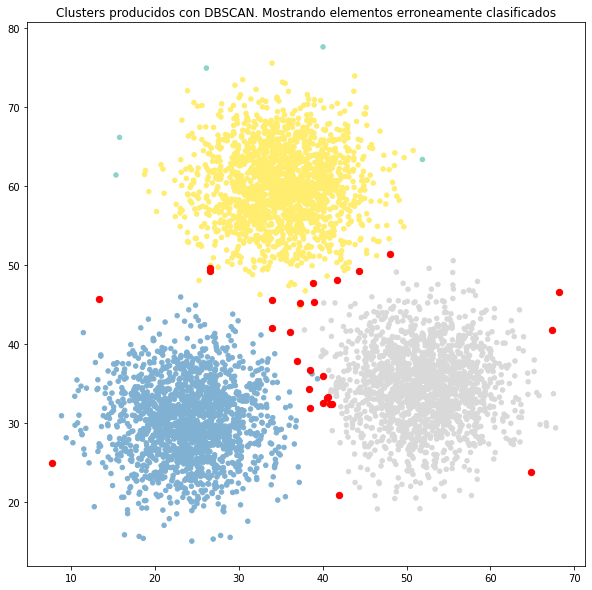

In [50]:
plt.scatter(X[:,0], X[:,1], c=etiquetas_dbscan, s=20, marker="o", cmap=cm.Set3)
errores_dbscan=encontrar_errores(etiquetas_dbscan, Clases_reales)
plt.scatter(errores_dbscan[:,0], errores_dbscan[:,1], s=40, marker="o", color="red")

plt.title("Clusters producidos con DBSCAN. Mostrando elementos erroneamente clasificados")

In [52]:
silhouette_score(X, etiquetas_dbscan)

0.6723834492118366

In [54]:
homogeneity_completeness_v_measure(Clases_reales, etiquetas_dbscan)

(0.9720560210205188, 0.9604880908580997, 0.9662374339590347)

In [55]:
#Para el caso de tres clusters claramente definidos, KMedias funciona ligeramente mejor que DBSCAN
#Probamos ahora con una distribucion de datos que no sean tan faciles de separar en grupos basandose en criterios geometricos

In [56]:
from sklearn.datasets import make_circles

In [57]:
X, Clases_reales=make_circles(n_samples=5000, factor=0.3, noise=0.05)

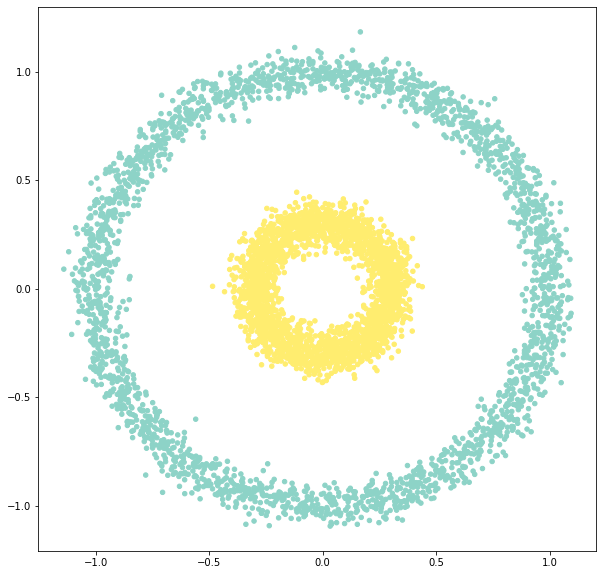

In [59]:
plt.scatter(X[:,0], X[:,1], c=Clases_reales, s=20, marker="o", cmap=cm.Set3)

In [60]:
estimador_kmedias=KMeans(n_clusters=2)
etiquetas_kmedias=estimador_kmedias.fit(X).labels_

Text(0.5, 1.0, 'Clusters producidos con KMedias')

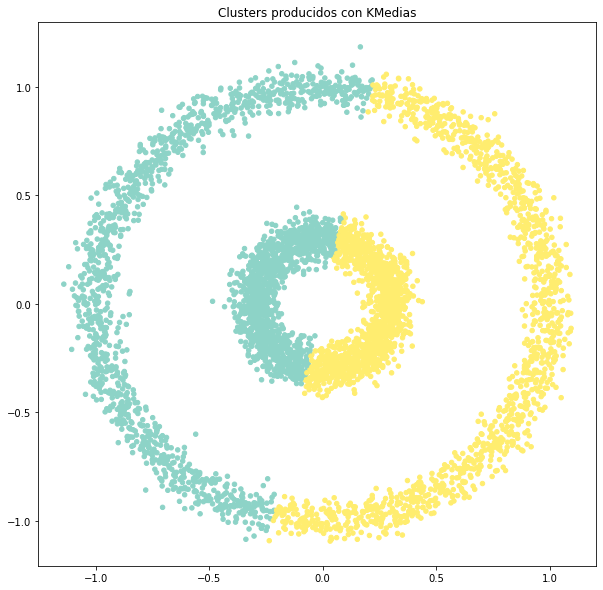

In [62]:
plt.scatter(X[:,0], X[:,1], c=etiquetas_kmedias, s=20, marker="o", cmap=cm.Set3)
plt.title("Clusters producidos con KMedias")

Text(0.5, 1.0, 'Clusters producidos con DBSCAN. Mostrando elementos erroneamente clasificados')

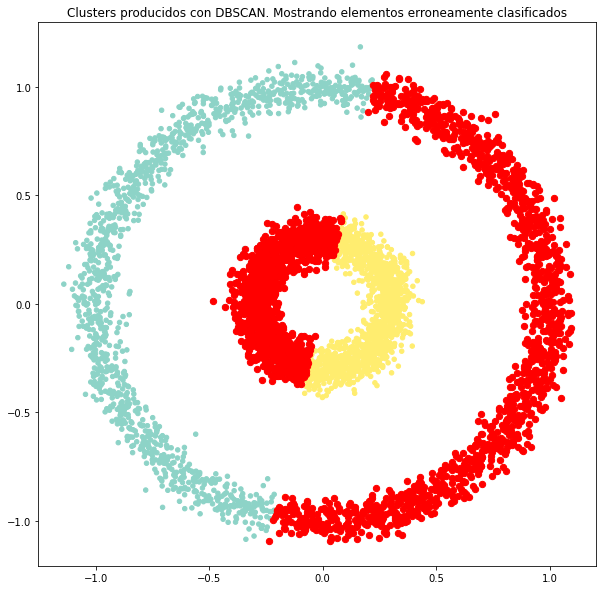

In [64]:
plt.scatter(X[:,0], X[:,1], c=etiquetas_kmedias, s=20, marker="o", cmap=cm.Set3)
errores_kmedias=encontrar_errores(etiquetas_kmedias, Clases_reales)
plt.scatter(errores_kmedias[:,0], errores_kmedias[:,1], s=40, marker="o", color="red")

plt.title("Clusters producidos con DBSCAN. Mostrando elementos erroneamente clasificados")

In [65]:
silhouette_score(X, etiquetas_kmedias)

0.2966960713575109

In [66]:
homogeneity_completeness_v_measure(Clases_reales, etiquetas_kmedias)

(2.8853961617241415e-06, 2.885399158905624e-06, 2.8853976603141043e-06)

In [67]:
estimador_dbscan=DBSCAN(eps=0.05, min_samples=10)
etiquetas_dbscan=estimador_dbscan.fit(X).labels_

In [68]:
numpy.unique(etiquetas_dbscan)

array([-1,  0,  1], dtype=int64)

Text(0.5, 1.0, 'Clusters producidos con DBSCAN. Mostrando elementos erroneamente clasificados')

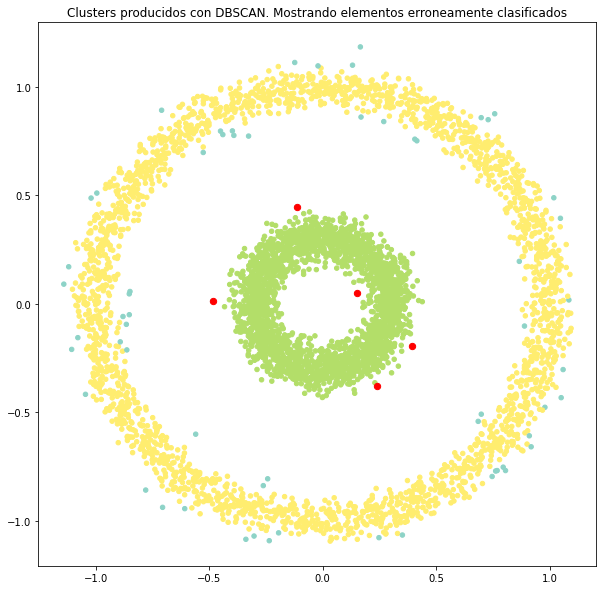

In [69]:
plt.scatter(X[:,0], X[:,1], c=etiquetas_dbscan, s=20, marker="o", cmap=cm.Set3)
errores_dbscan=encontrar_errores(etiquetas_dbscan, Clases_reales)
plt.scatter(errores_dbscan[:,0], errores_dbscan[:,1], s=40, marker="o", color="red")

plt.title("Clusters producidos con DBSCAN. Mostrando elementos erroneamente clasificados")

In [71]:
silhouette_score(X, etiquetas_dbscan)

0.2023279123570534

In [72]:
homogeneity_completeness_v_measure(Clases_reales, etiquetas_dbscan)

(0.9948909212376237, 0.9143903426336633, 0.9529435684180261)

In [73]:
#Una desventaja del estimador DBSCAN en sklear es que no tiene el metodo predict. Esdecir, no puede asignar clusters a nuevos puntos sin tener que ajustar el estimador desde cero

#HDBSCAN
#es la version actualizada del algoritmo DBSCAN (el original es de 1996, la actualizacion se publico en 2015). Esta disponible como contribucion de scikit-learn en el paquete hdbscan

In [79]:
import sys
!{sys.executable} -m pip install hdbscan 

   command: 'c:\Users\xmax1\Desktop\tf15\Scripts\python.exe' 'c:\Users\xmax1\Desktop\tf15\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\xmax1\AppData\Local\Temp\tmpjwq4dsvd'
       cwd: C:\Users\xmax1\AppData\Local\Temp\pip-install-9ubms1eu\hdbscan_ac50302d1db046a0bfdcaf3d53677e8e
  Complete output (27 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-3.7\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-3.7\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-3.7\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-3.7\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-3.7\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-3.7\hdbscan
  copying hdbscan\__init__.py -> build\lib.win-amd64-3.7\hdbscan
  creating build\lib.win-amd64-3.7\hdbscan\

In [80]:
#Al contrario que DBSCAN, la implementacion de hdbscan tiene un metodo approximate_presict que un avez ajustado permite asignar clusters a nuevos puntos sin tener que realizar todo el proceso desde cero